<a href="https://colab.research.google.com/github/MichaelAshton/Analyzing_Distributions/blob/master/analyzing_distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Part 1
Follow the [“Histograms and Density Plots in Python”](https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0) tutorial to figure out which airline is most likely to get you to your destination on time.

In [1]:
# install git lfs which we will use to read the data
!apt-get install software-properties-common
!add-apt-repository ppa:git-core/ppa
!curl -s https://packagecloud.io/install/repositories/github/git-lfs/script.deb.sh | sudo bash
!apt-get install git-lfs
!git lfs install
# clone the repo that contains the data
!git lfs clone https://github.com/WillKoehrsen/Data-Analysis.git

Reading package lists... Done
Building dependency tree       
Reading state information... Done
software-properties-common is already the newest version (0.96.24.32.7).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.
 The most current stable version of Git for Ubuntu.

For release candidates, go to https://launchpad.net/~git-core/+archive/candidate .
 More info: https://launchpad.net/~git-core/+archive/ubuntu/ppa
Press [ENTER] to continue or Ctrl-c to cancel adding it.

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:3 http://ppa.launchpad.net/git-core/ppa/ubuntu bionic InRelease [20.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Ign:7 https://developer.download.nvidia.com/comp

In [2]:
import pandas as pd
# Read in data and examine first 10 rows
flights = pd.read_csv('Data-Analysis/univariate_dist/data/formatted_flights.csv')
flights.head(10)

,Unnamed: 0,arr_delay,name
0,0,11.0,United Air Lines Inc.
1,1,20.0,United Air Lines Inc.
2,2,33.0,American Airlines Inc.
3,3,-18.0,JetBlue Airways
4,4,-25.0,Delta Air Lines Inc.
5,5,12.0,United Air Lines Inc.
6,6,19.0,JetBlue Airways
7,7,-14.0,ExpressJet Airlines Inc.
8,8,-8.0,JetBlue Airways
9,9,8.0,American Airlines Inc.


#### Histograms

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'Flights')

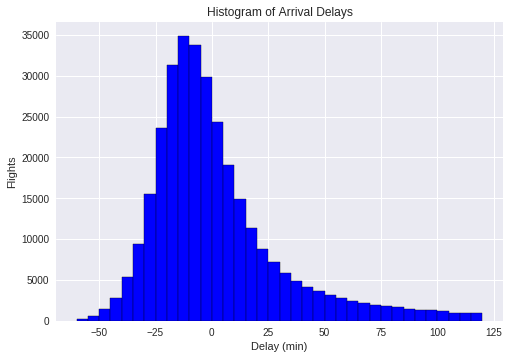

In [0]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(flights['arr_delay'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(flights['arr_delay'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

#### When Histograms Fail

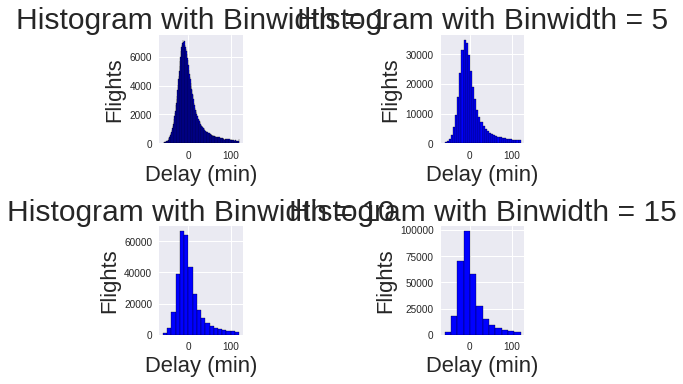

In [0]:
# Show 4 different binwidths
for i, binwidth in enumerate([1, 5, 10, 15]):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    ax.hist(flights['arr_delay'], bins = int(180/binwidth),
             color = 'blue', edgecolor = 'black')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 30)
    ax.set_xlabel('Delay (min)', size = 22)
    ax.set_ylabel('Flights', size= 22)

plt.tight_layout()
plt.show()

#### Solution #1: Side-by-Side Histograms

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'Side-by-Side Histogram with Multiple Airlines')

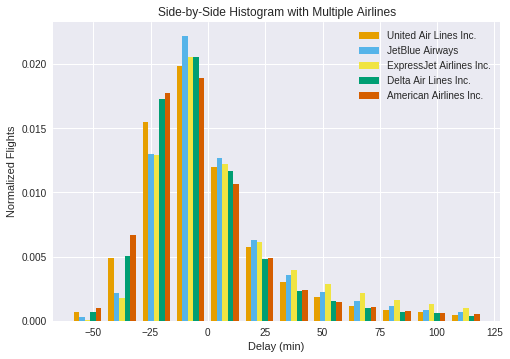

In [0]:
# Make a separate list for each airline
x1 = list(flights[flights['name'] == 'United Air Lines Inc.']['arr_delay'])
x2 = list(flights[flights['name'] == 'JetBlue Airways']['arr_delay'])
x3 = list(flights[flights['name'] == 'ExpressJet Airlines Inc.']['arr_delay'])
x4 = list(flights[flights['name'] == 'Delta Air Lines Inc.']['arr_delay'])
x5 = list(flights[flights['name'] == 'American Airlines Inc.']['arr_delay'])

# Assign colors for each airline and the names
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
names = ['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.',
         'Delta Air Lines Inc.', 'American Airlines Inc.']
         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), normed=True,
         color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('Delay (min)')
plt.ylabel('Normalized Flights')
plt.title('Side-by-Side Histogram with Multiple Airlines')

#### Solution #2: Stacked Bars

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


([array([0.00017083, 0.00116771, 0.00370547, 0.00476932, 0.00287629,
         0.00138281, 0.00072901, 0.00044126, 0.00027838, 0.00020857,
         0.00015579, 0.00010755]),
  array([0.00023071, 0.0016487 , 0.00660049, 0.00970267, 0.00570491,
         0.0027801 , 0.00152895, 0.0009407 , 0.00061805, 0.00046169,
         0.0003462 , 0.00026164]),
  array([0.00024915, 0.00202385, 0.00927559, 0.01396092, 0.00822649,
         0.00405252, 0.00234649, 0.00154172, 0.00106158, 0.00080392,
         0.00061266, 0.00047276]),
  array([0.00038905, 0.00302385, 0.01269644, 0.01803103, 0.01054121,
         0.00500826, 0.00281074, 0.00184167, 0.00125143, 0.00094183,
         0.0007256 , 0.00055278]),
  array([0.00051816, 0.00391319, 0.01505031, 0.02054609, 0.01195296,
         0.0056544 , 0.00312885, 0.00203719, 0.00139359, 0.00104314,
         0.00080591, 0.00062288])],
 array([-60., -45., -30., -15.,   0.,  15.,  30.,  45.,  60.,  75.,  90.,
        105., 120.]),
 <a list of 5 Lists of Patches objects

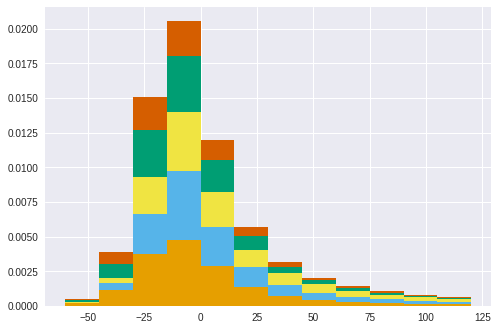

In [0]:
# Stacked histogram with multiple airlines
plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), stacked=True,
         normed=True, color = colors, label=names)

#### Best solution : Density Plots

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


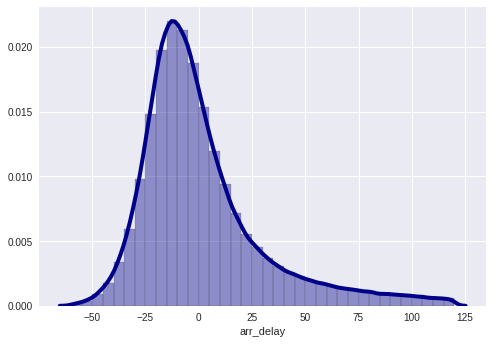

In [0]:
# Density Plot and Histogram of all arrival delays
sns.distplot(flights['arr_delay'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Text(0, 0.5, 'Density')

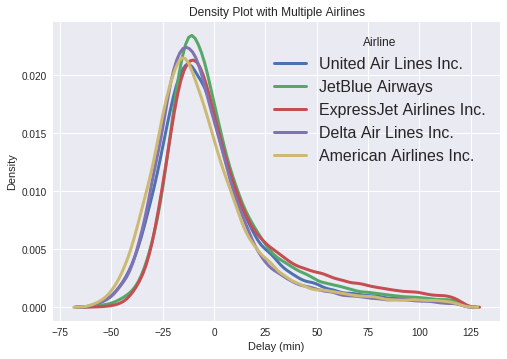

In [0]:
# List of five airlines to plot
airlines = ['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.',
         'Delta Air Lines Inc.', 'American Airlines Inc.']

# Iterate through the five airlines
for airline in airlines:
    # Subset to the airline
    subset = flights[flights['name'] == airline]
    
    # Draw the density plot
    sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = airline)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')

#### Shaded Density Plots

Text(0, 0.5, 'Density')

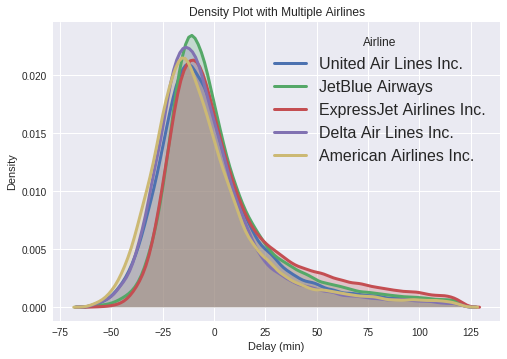

In [0]:
# List of five airlines to plot
airlines = ['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.',
         'Delta Air Lines Inc.', 'American Airlines Inc.']

# Iterate through the five airlines
for airline in airlines:
    # Subset to the airline
    subset = flights[flights['name'] == airline]
    
    # Draw the density plot
    sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = airline)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')

#### Rug Plots

Text(0, 0.5, 'Density')

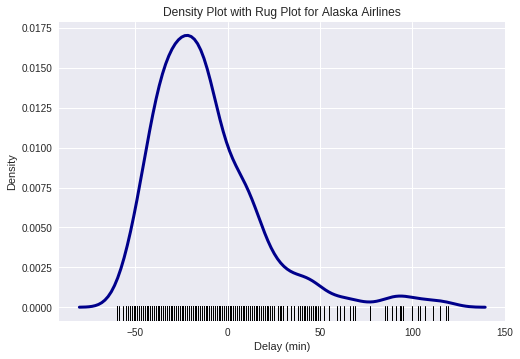

In [0]:
# Subset to Alaska Airlines
subset = flights[flights['name'] == 'Alaska Airlines Inc.']

# Density Plot with Rug Plot
sns.distplot(subset['arr_delay'], hist = False, kde = True, rug = True,
             color = 'darkblue', 
             kde_kws={'linewidth': 3},
             rug_kws={'color': 'black'})

# Plot formatting
plt.title('Density Plot with Rug Plot for Alaska Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')

### Part 2
#### Challenge is to prove/disprove the 4 aspects of the central limit theorem :
 1. The sampling distribution of the mean will be less spread than values in the population from which the sample is drawn
 2. The sampling distribution will be well modelled by a normal distribution (and it will get closer with larger sample sizes)
 3. The spread of the sampling distribution is related to the spread of the population values (mean = population mean, std dev = population std dev / sqrt(sample size))
 4. Bigger samples lead to a smaller spread in the sampling distribution

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
flights.head()

,Unnamed: 0,arr_delay,name
0,0,11.0,United Air Lines Inc.
1,1,20.0,United Air Lines Inc.
2,2,33.0,American Airlines Inc.
3,3,-18.0,JetBlue Airways
4,4,-25.0,Delta Air Lines Inc.


In [10]:
# population stats
flights.arr_delay.describe()

count    317113.000000
mean          1.297143
std          29.064401
min         -60.000000
25%         -17.000000
50%          -6.000000
75%          11.000000
max         120.000000
Name: arr_delay, dtype: float64

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'Occurrences')

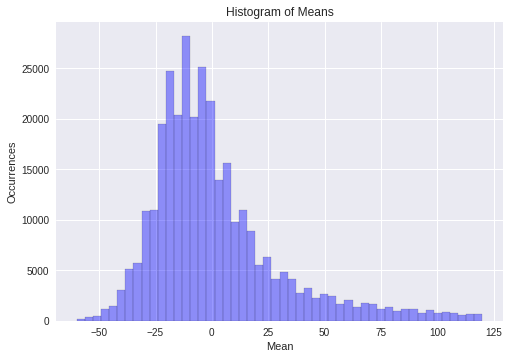

In [46]:
# population distribution

# seaborn histogram
sns.distplot(flights.arr_delay, hist=True, kde=False,
             color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Means')
plt.xlabel('Mean')
plt.ylabel('Occurrences')

In [0]:
# pick a sample size
n = 1000

# take 50 random sample and calculate the mean and std dev
means = []
stds = []
for i in range(50):
  sample = flights.sample(n)
  mean = sample.arr_delay.describe()['mean']
  std = sample.arr_delay.describe()['std']
  means.append(mean)
  stds.append(std)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'Occurrences')

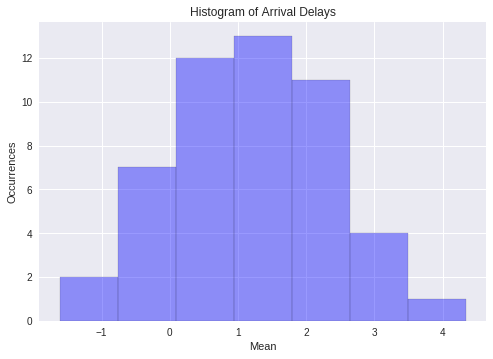

In [20]:
# seaborn histogram
sns.distplot(means, hist=True, kde=False,
             color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Means')
plt.xlabel('Mean')
plt.ylabel('Occurrences')

1st and 2nd aspects are correct

In [61]:
# 3rd aspect is correct for the mean (must have made a mistake with the std?)
print('sampling mean : {} , population mean : {}'.format(np.mean(means), flights.arr_delay.describe()['mean']))
print('sampling std : {}, expected std : {}'.format(np.std(stds), flights.arr_delay.describe()['std'] / np.sqrt(n)))


sampling mean : 1.2941613333333333 , population mean : 1.2971432896160044
sampling std : 0.1610400116638751, expected std : 0.9190970606202752


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'Occurrences')

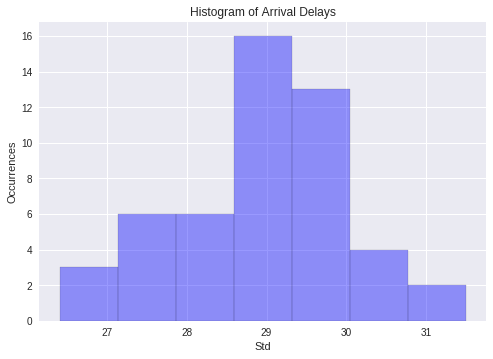

In [23]:
# seaborn histogram
sns.distplot(stds, hist=True, kde=False,
             color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Stds')
plt.xlabel('Std')
plt.ylabel('Occurrences')

#### how does sample size affect the results?

In [0]:
# list of sample sizes to try out
sample_sizes = [50, 300, 1000, 5000, 30000]

Text(0, 0.5, 'Occurrences')

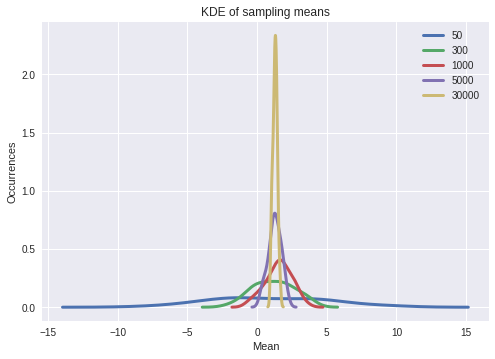

In [44]:
for n in sample_sizes:

  # take 50 random sample and calculate the mean and std dev
  means = []
  stds = []
  for i in range(50):
    sample = flights.sample(n)
    mean = sample.arr_delay.describe()['mean']
    means.append(mean)
    
  # Draw the density plot
  sns.distplot(means, hist = False, kde = True,
               norm_hist = True,
               kde_kws = {'linewidth': 3},
               label = n)
  
# Add labels
plt.title('KDE of sampling means')
plt.xlabel('Mean')
plt.ylabel('Occurrences')  

Text(0, 0.5, 'Occurrences')

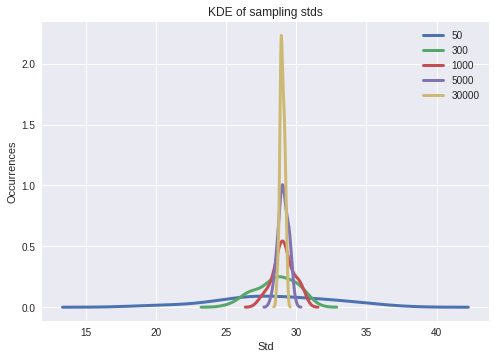

In [45]:
for n in sample_sizes:

  # take 50 random sample and calculate the std dev
  stds = []
  for i in range(50):
    sample = flights.sample(n)
    std = sample.arr_delay.describe()['std']
    stds.append(std)
    
  # Draw the density plot
  sns.distplot(stds, hist = False, kde = True,
               norm_hist = True,
               kde_kws = {'linewidth': 3},
               label = n)
  
# Add labels
plt.title('KDE of sampling stds')
plt.xlabel('Std')
plt.ylabel('Occurrences')  

4th aspect is correct